In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


a) Uploading dataset and removing unnecessary punctuations from tweet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

data=pd.read_csv('train.csv') 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)   
    return input_txt  

data['new'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data.head()

,id,label,tweet,new
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


b) Replacing punctuations

In [5]:
data['new'] = data['new'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,label,tweet,new
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


c) Removing stopwords (words that doesn't add much meaning)

In [6]:
data['new'] = data['new'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,new
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


d) Tokenization - Splitting Words

In [7]:
tokenized_tweet = data['new'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: new, dtype: object

e) Joining tokenized words together

In [8]:
all_words = ' '.join([text for text in data['new']])
all_words

'when father dysfunctional selfish drags kids into dysfunction #run thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked bihday your majesty #model love take with time factsguide society #motivation huge fare talking before they leave chaos disputes when they there #allshowandnogo camping tomorrow danny next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl love land #allin #cavs #champions #cleveland #clevelandcavaliers welcome here #ireland consumer price index climbed from previous #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love daddy today days #gettingfed #cnn calls #michigan middle school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins ouch junior angry #got #junior #yugyoem #omg thankful having paner #thankful #positive retweet agree #fri

Word Cloud implementation to identify positive and negative tweets

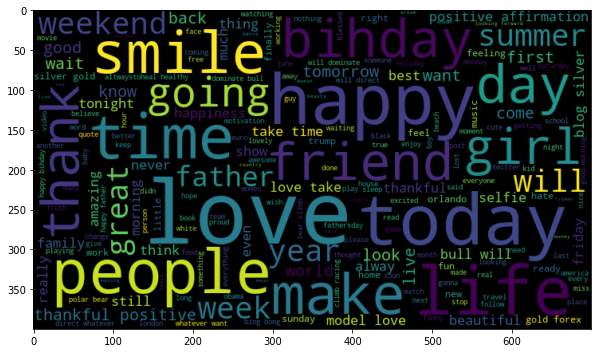

In [9]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=700, height=400, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('on')
plt.show()

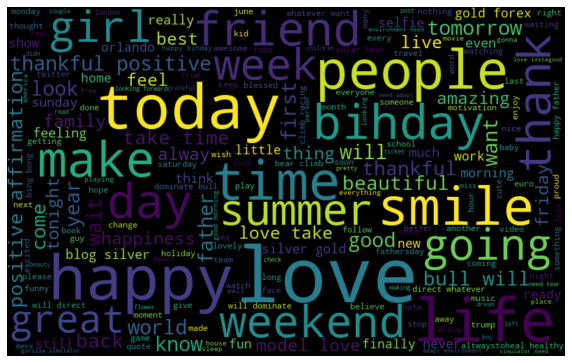

In [10]:
#Generate the word Cloud for the positive tweets
positive_words = ' '.join([text for text in data['new'][data['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

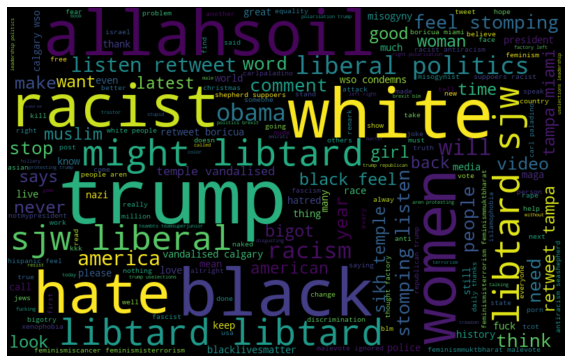

In [11]:
#Generate the word Cloud for the negative tweets
negative_words = ' '.join([text for text in data['new'][data['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
#function for extracting hashtag
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# Identify the hash tags with positive tweets and negative tweets
HT_regular = hashtag_extract(data['new'][data['label'] == 0])

# extracting hashtags from racist tweets
HT_negative = hashtag_extract(data['new'][data['label'] == 1])

In [13]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
print(HT_regular)
print(HT_negative)

['run', 'lyft', 'disapointed', 'getthanked', 'model', 'motivation', 'allshowandnogo', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish', 'heabreaking', 'values', 'love', 'gettingfed', 'got', 'junior', 'yugyoem', 'omg', 'thankful', 'positive', 'friday', 'cookies', 'euro', 'badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssas', 'love', 'smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylife', 'photoshop', 'enoughisenough', 'dontphotoshopeverything', 'wheresal

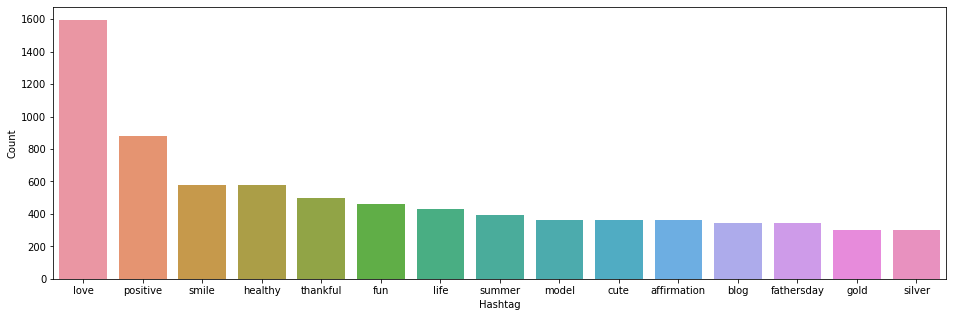

In [14]:
#Plot the top 15 positive hash tags using the bar chart.
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 15 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

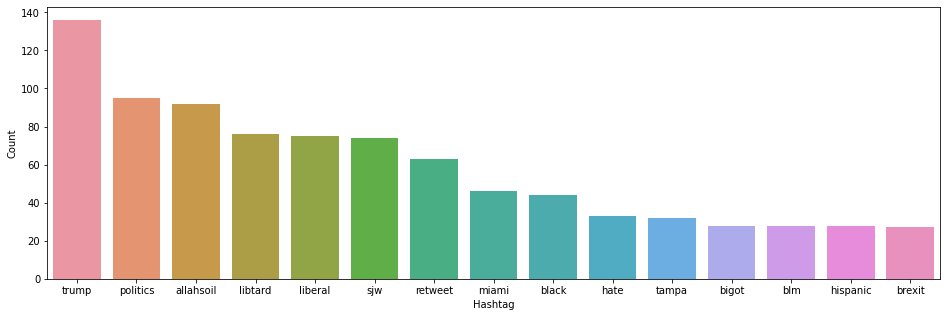

In [15]:
#Plot the top 15 negative hash tags using the bar chart.
import nltk
import seaborn as sns
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 15 most frequent hashtags
e = e.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()